# 10주차: 09장 데이터분석 프로젝트

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
pd.set_option('display.precision', 2)

In [5]:
%config InlineBackend.figure_format = 'retina'

In [6]:
!pip install pyreadstat

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB 1.2 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.4 MB 2.2 MB/s eta 0:00:01
   ------ --------------------------------- 0.4/2.4 MB 2.5 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.4 MB 3.4 MB/s eta 0:00:01
   -------------- ------------------------- 0.9/2.4 MB 3.4 MB/s eta 0:00:01
   -------------------- ------------------- 1.2/2.4 MB 4.0 MB/s eta 0:00:01
   ------------------------- -------------- 1.5/2.4 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.8/2.4 MB 4.6 MB/s eta 0:00:01
   --------------------------------- ------ 2.0/2.4 MB 4.9 MB/s eta 0:00:01
   --------------------------------- ------ 2.0/2.4 MB 4.3 MB/s eta 0:00:01
   ------------------------------------ --- 2.2/2.4 MB 4.1 MB/s eta 0:00:01
   -----------------------

In [7]:
raw_welfare = pd.read_spss('data/Koweps_hpwc14_2019_beta2.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [8]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [9]:
welfare = raw_welfare.copy()
welfare.shape

(14418, 830)

In [10]:
welfare = welfare.rename(columns= {'h14_g3': 'sex', 
                                   'h14_g4': 'birth',
                                   'h14_g10': 'marriage_type',
                                   'h14_g11': 'religion',
                                   'p1402_8aq1': 'income',
                                   'h14_eco9': 'code_job',
                                   'h14_reg7': 'code_region'})
welfare['sex']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64

In [11]:
welfare.sex.dtypes

dtype('float64')

In [12]:
welfare.sex.value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [13]:
welfare.sex.isna().sum()

0

In [14]:
welfare['sex'] = np.where(welfare.sex == 1, 'male', 'female')
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

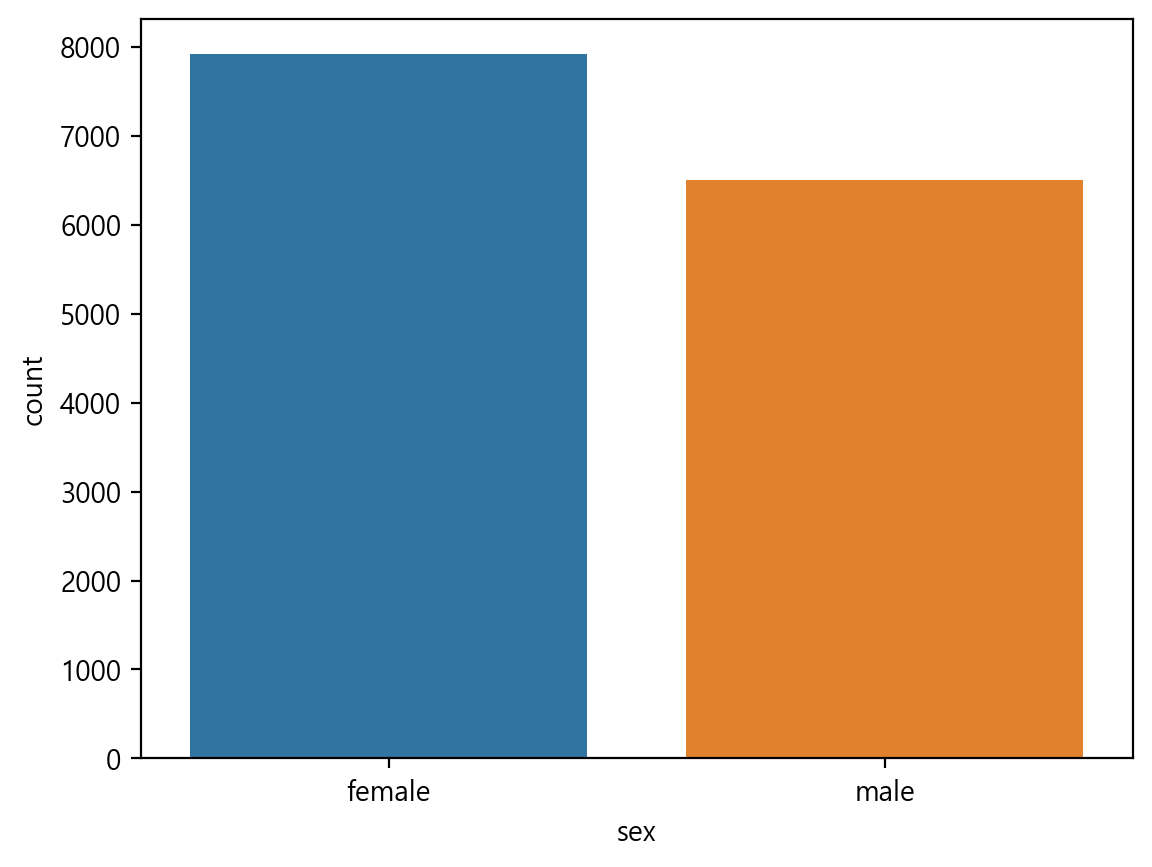

In [15]:
sns.countplot(welfare, x='sex', hue='sex');

In [16]:

welfare['income'].dtypes

dtype('float64')

In [17]:
welfare['income'].describe()

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

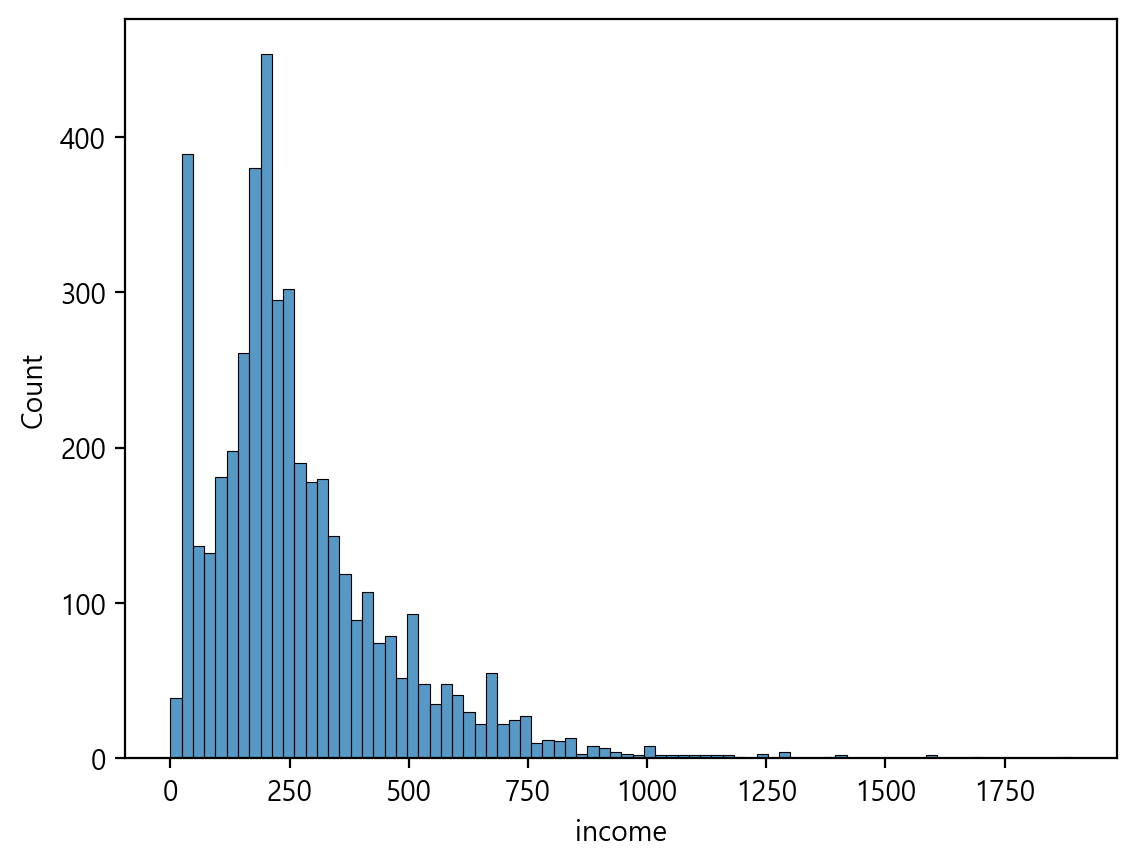

In [18]:
sns.histplot(welfare, x='income');

In [19]:
welfare['income'].isna().sum()

9884

In [20]:
sex_income = welfare.groupby('sex', as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


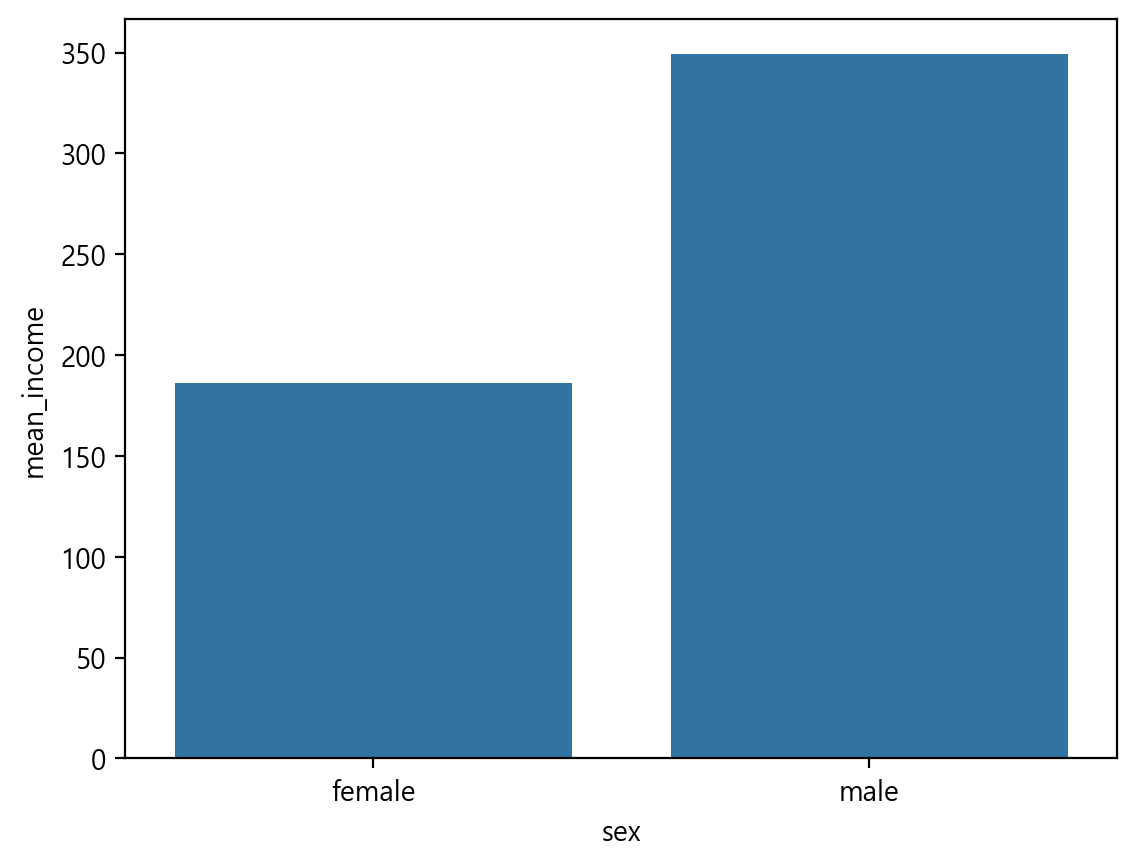

In [21]:
sns.barplot(sex_income, x='sex', y='mean_income');

## 나이와 월급의 관계

In [22]:
welfare['birth'].dtypes

dtype('float64')

In [23]:
welfare['birth'].describe()

count    14418.00
mean      1969.28
std         24.40
min       1907.00
25%       1948.00
50%       1968.00
75%       1990.00
max       2018.00
Name: birth, dtype: float64

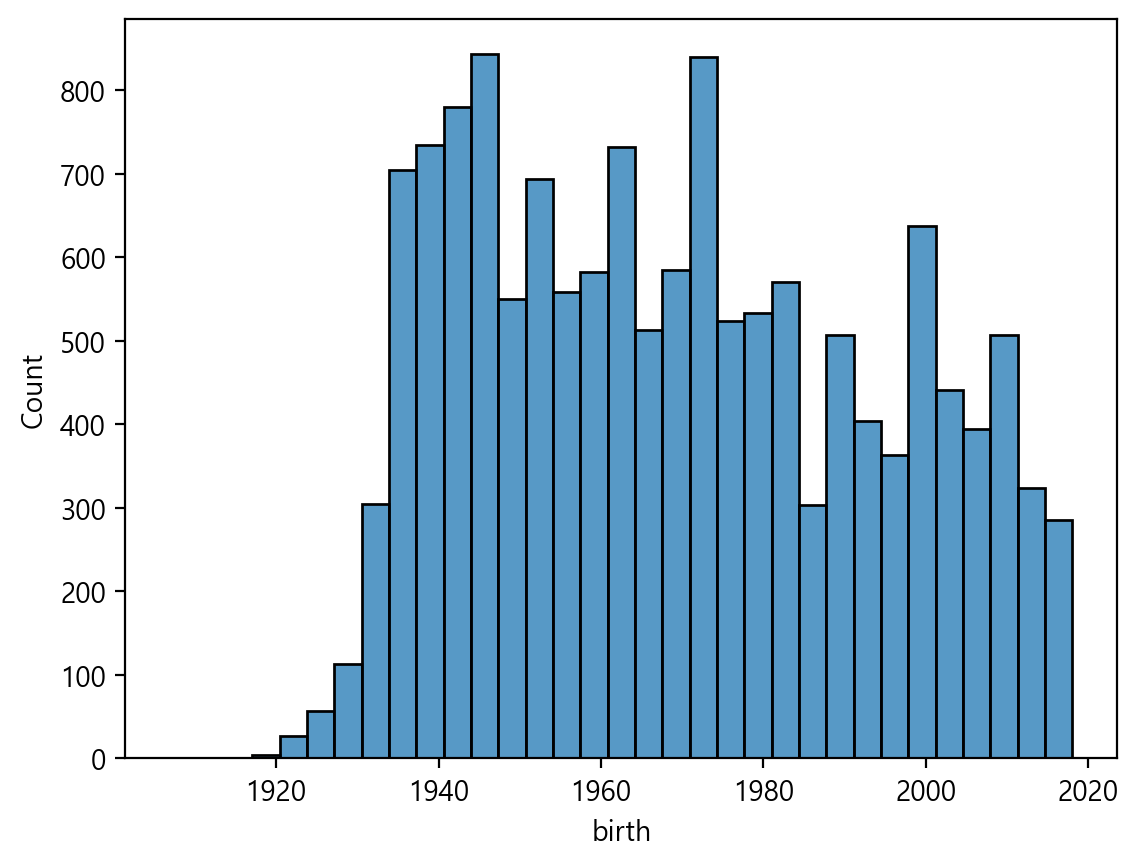

In [24]:
sns.histplot(welfare, x='birth');

In [25]:
welfare['birth'].isna().sum()

0

In [26]:
welfare = welfare.assign(age = 2019 - welfare['birth'])
welfare['age'].describe()

count    14418.00
mean        49.72
std         24.40
min          1.00
25%         29.00
50%         51.00
75%         71.00
max        112.00
Name: age, dtype: float64

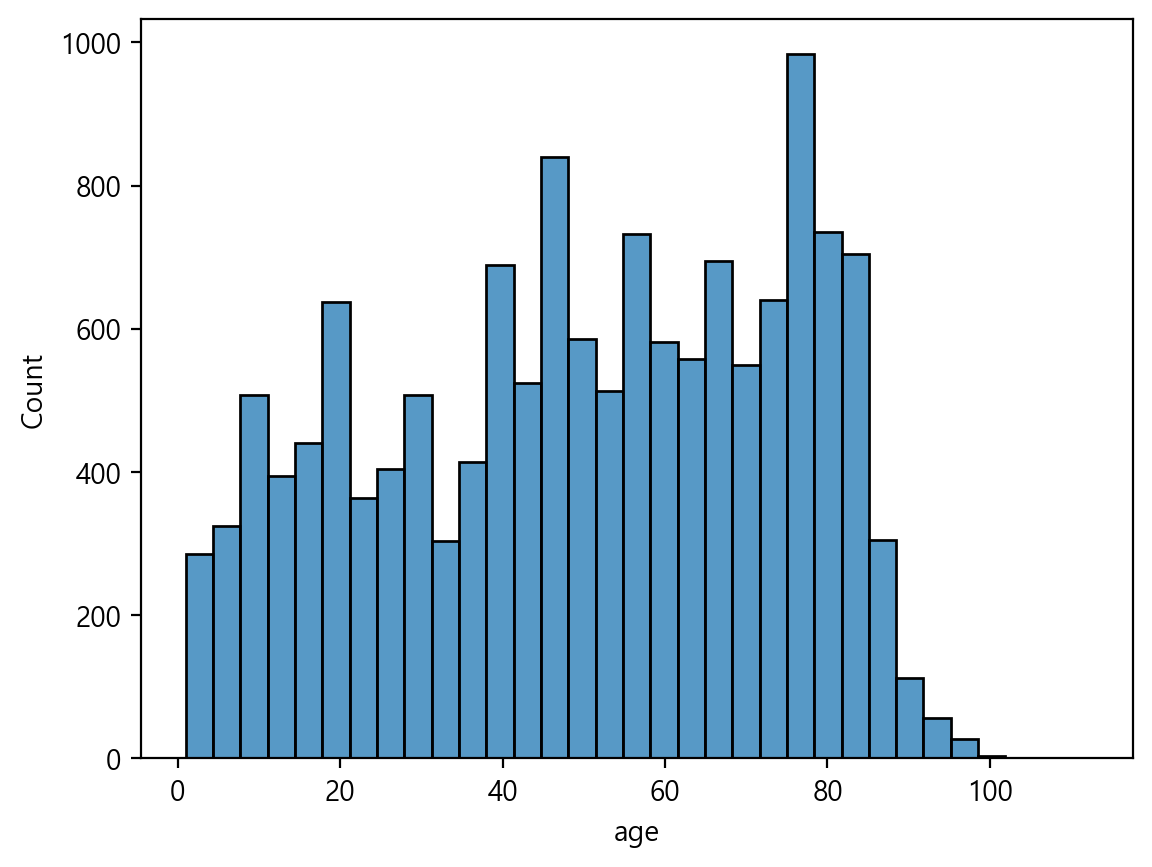

In [27]:
sns.histplot(welfare, x='age');

In [28]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
18.0,162.00
19.0,121.33
20.0,136.40
21.0,123.67
22.0,179.68


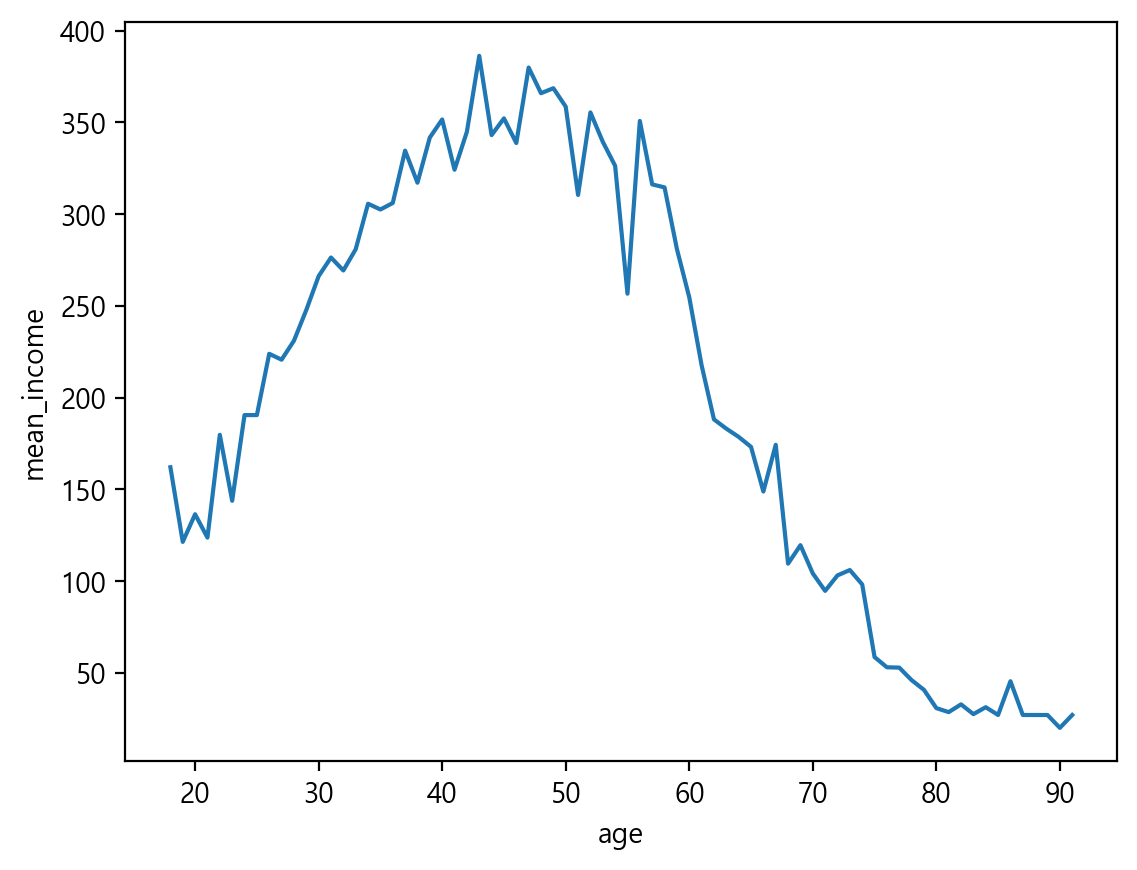

In [29]:
sns.lineplot(age_income, x='age', y = 'mean_income');

In [30]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young', 
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

In [31]:
welfare['ageg'].value_counts()

ageg
old       5743
middle    5066
young     3609
Name: count, dtype: int64

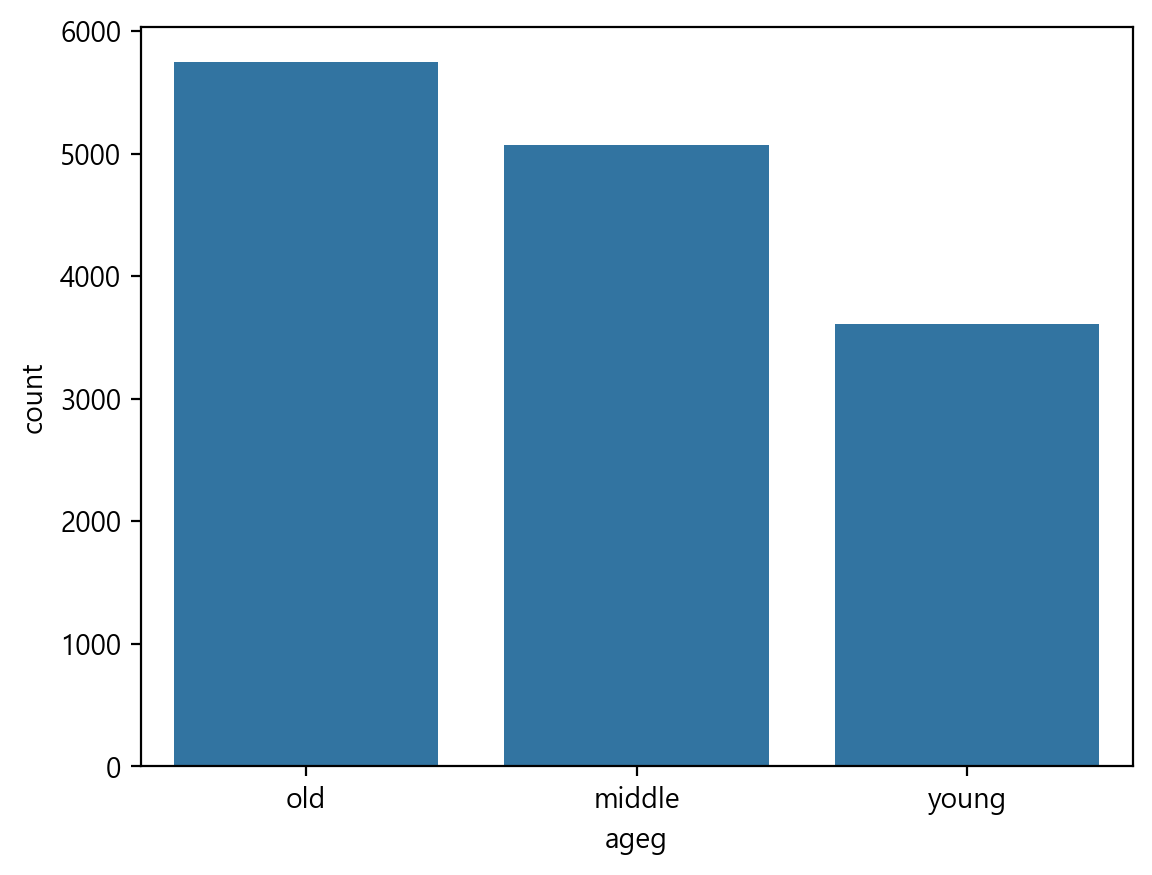

In [32]:

sns.countplot(welfare, x='ageg');

In [33]:
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg') \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,mean_income
ageg,
middle,329.74
old,126.26
young,202.60


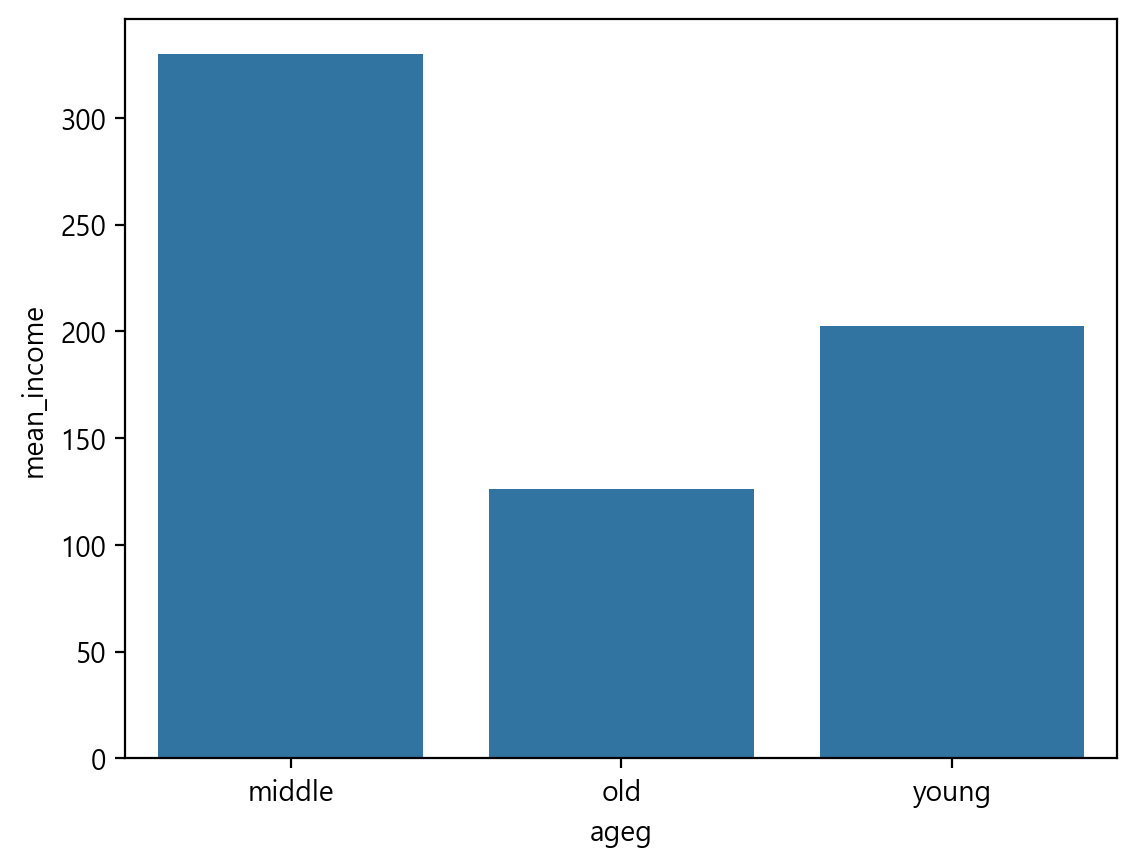

In [34]:
sns.barplot(ageg_income, x='ageg', y='mean_income');

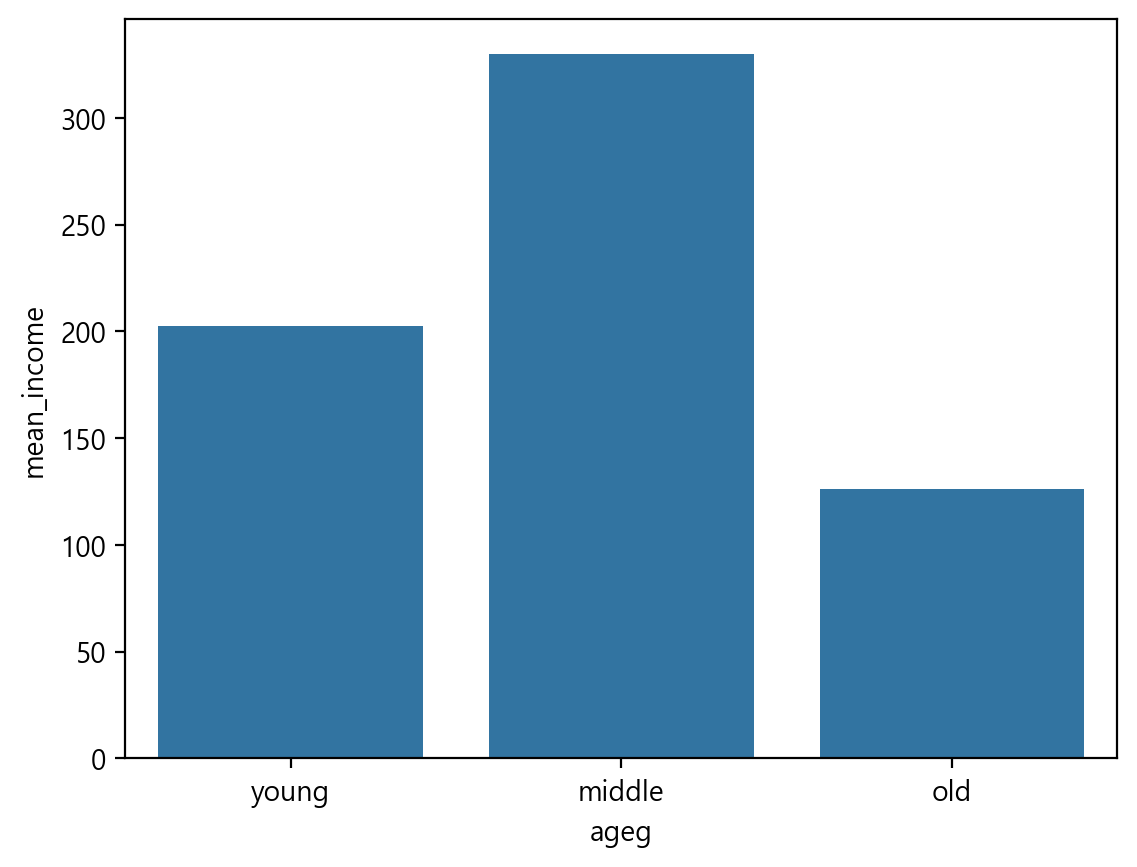

In [35]:
sns.barplot(ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old']);

## 10주차 종료, 11주차는 09-5부터 시작